In [49]:
import numpy as np
import pandas as pd


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

In [10]:
import pandas as pd
import zipfile

# Open the zip file
with zipfile.ZipFile('/content/train_data.txt.zip', 'r') as zip_ref:
    # Extract the file to the current directory
    zip_ref.extractall('.')

# Read the extracted file using pandas
train_data = pd.read_csv('train_data.txt', sep=":::", names=['movie', 'genre', 'description'], engine='python')

In [11]:
train_data.shape

(54214, 3)

In [12]:
train_data.head()

,movie,genre,description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [15]:
import pandas as pd
import zipfile

# Open the zip file
with zipfile.ZipFile('/content/test_data.txt (1).zip', 'r') as zip_ref:
    # Extract the file to the current directory
    zip_ref.extractall('.')

# Read the extracted file using pandas
test_data = pd.read_csv('test_data.txt', sep=":::", names=['movie', 'genre', 'description'], engine='python')

In [16]:
test_data.shape

(54200, 3)

In [17]:
test_data.head()

,movie,genre,description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [18]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movie        54214 non-null  object
 1   genre        54214 non-null  object
 2   description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
None


In [19]:
train_data.isnull().sum()

,0
movie,0
genre,0
description,0


In [20]:
train_data.describe()

,movie,genre,description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [21]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movie        54200 non-null  int64 
 1   genre        54200 non-null  object
 2   description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB
None


In [22]:
test_data.describe()

,movie
count,54200.000000
mean,27100.500000
std,15646.336632
min,1.000000
25%,13550.750000
50%,27100.500000
75%,40650.250000
max,54200.000000


In [23]:
test_data.isnull().sum()

,0
movie,0
genre,0
description,0


In [24]:
train_data.loc[:,'description'] = train_data['description'].astype(str).str.lower()
test_data.loc[:,'description'] = test_data['description'].astype(str).str.lower()

In [25]:
train_data.drop(columns=['movie'], inplace = True)
test_data.drop(columns=['movie'], inplace = True)

In [26]:
train_data.duplicated().sum()

110

In [27]:
test_data.duplicated().sum()

0

In [28]:
train_data = train_data.drop_duplicates()
test_data = test_data.drop_duplicates()
print('check train data after drop duplicate :',train_data.duplicated().sum())
print('check test data after drop duplicate :',test_data.duplicated().sum())

check train data after drop duplicate : 0
check test data after drop duplicate : 0


<function matplotlib.pyplot.show(close=None, block=None)>

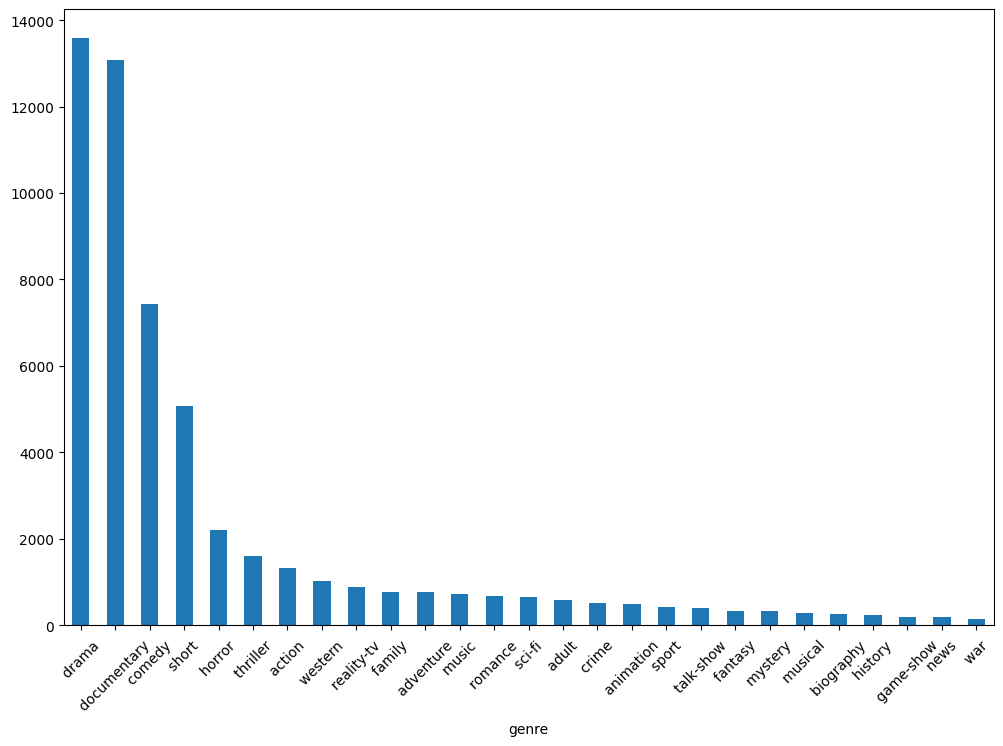

In [29]:
genre_value_counts=train_data['genre'].value_counts()
plt.figure(figsize=(12,8))
genre_value_counts.plot(kind='bar')
plt.title='Distribution of Movies Genre'
plt.xlabel='Genre'
plt.ylabel='No. of Movies'
plt.xticks(rotation=45)
plt.show

In [30]:
x_train_full = train_data['description']
y_train_full = train_data['genre']

x_test = test_data['description']
y_test = test_data['genre']

In [31]:
from sklearn.model_selection import train_test_split
X_train , X_val , Y_train , Y_val = train_test_split(x_train_full , y_train_full , test_size=0.2 , random_state=42)

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words ='english' , max_features=5000)
X_train_vec = tfidf.fit_transform(X_train)
X_val_vec = tfidf.transform(X_val)
X_test_vec = tfidf.transform(x_test)

In [38]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_vec, Y_train)

MultinomialNB()

In [39]:
y_pred_val = nb.predict(X_val_vec)

In [40]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_val = accuracy_score(Y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)
print("Validation Classification Report:")
print(classification_report(Y_val, y_pred_val, zero_division=0))

Validation Accuracy: 0.5261990573884114
Validation Classification Report:
               precision    recall  f1-score   support

      action        0.52      0.06      0.11       271
       adult        0.50      0.03      0.06       118
   adventure        0.64      0.06      0.12       141
   animation        0.00      0.00      0.00        84
   biography        0.00      0.00      0.00        54
      comedy        0.51      0.44      0.47      1445
       crime        0.00      0.00      0.00        88
 documentary        0.59      0.89      0.71      2685
       drama        0.46      0.83      0.59      2720
      family        0.00      0.00      0.00       145
     fantasy        0.00      0.00      0.00        57
   game-show        1.00      0.20      0.33        40
     history        0.00      0.00      0.00        52
      horror        0.71      0.34      0.46       429
       music        0.93      0.09      0.17       148
     musical        0.00      0.00      0.00 

In [41]:
y_pred_test = nb.predict(X_test_vec)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("\nTest Accuracy:", accuracy_test)
print("Test Classification Report:")
print(classification_report(y_test, y_pred_test, zero_division=0))

Streaming output truncated to the last 5000 lines.
                                                                                                                      The complaint (2017)        0.00      0.00      0.00       1.0
                                                                                                                    The die is cast (2016)        0.00      0.00      0.00       1.0
                                                                                                               The face next to you (2016)        0.00      0.00      0.00       1.0
                                                                                                            The guardian of the ice (2015)        0.00      0.00      0.00       1.0
                                                                                                               The in Between Place (????)        0.00      0.00      0.00       1.0
                                            

In [42]:
from sklearn.linear_model import LogisticRegression
LogisticRegression=LogisticRegression(max_iter=1000)
LogisticRegression.fit(X_train_vec,Y_train)

LogisticRegression(max_iter=1000)

In [43]:
y_pred_val_log = LogisticRegression.predict(X_val_vec)

In [44]:
accuracy_val = accuracy_score(Y_val, y_pred_val_log)
print("Validation Accuracy:", accuracy_val)
print("Validation Classification Report:")
print(classification_report(Y_val, y_pred_val, zero_division=0))

Validation Accuracy: 0.5844191849182145
Validation Classification Report:
               precision    recall  f1-score   support

      action        0.52      0.06      0.11       271
       adult        0.50      0.03      0.06       118
   adventure        0.64      0.06      0.12       141
   animation        0.00      0.00      0.00        84
   biography        0.00      0.00      0.00        54
      comedy        0.51      0.44      0.47      1445
       crime        0.00      0.00      0.00        88
 documentary        0.59      0.89      0.71      2685
       drama        0.46      0.83      0.59      2720
      family        0.00      0.00      0.00       145
     fantasy        0.00      0.00      0.00        57
   game-show        1.00      0.20      0.33        40
     history        0.00      0.00      0.00        52
      horror        0.71      0.34      0.46       429
       music        0.93      0.09      0.17       148
     musical        0.00      0.00      0.00 

In [45]:
y_pred_test_log = LogisticRegression.predict(X_test_vec)
accuracy_test = accuracy_score(y_test, y_pred_test_log)
print("\nTest Accuracy:", accuracy_test)
print("Test Classification Report:")
print(classification_report(y_test, y_pred_test, zero_division=0))

Streaming output truncated to the last 5000 lines.
                                                                                                                      The complaint (2017)        0.00      0.00      0.00       1.0
                                                                                                                    The die is cast (2016)        0.00      0.00      0.00       1.0
                                                                                                               The face next to you (2016)        0.00      0.00      0.00       1.0
                                                                                                            The guardian of the ice (2015)        0.00      0.00      0.00       1.0
                                                                                                               The in Between Place (????)        0.00      0.00      0.00       1.0
                                            